# Tutorial: Clasificación KMeans
---
Por Aldo Garcia Castañeda

## 1.1 Fundamentos de la técnica

KMeans es un algoritmo de agrupamiento (clustering) no supervisado que busca particionar un conjunto de n muestras en **k** clusters, minimizando la varianza intra-cluster. Se elige un número k de centroides y se itera entre asignar cada punto al centroide más cercano y recalcular los centroides como la media de los puntos asignados.

El objetivo es **minimizar la suma de distancias cuadradas dentro de cada grupo**

Características clave:
- No supervisado (no necesita etiquetas para entrenar).
- Sensible a la inicialización y a escala de variables.
- Requiere decidir k (número de clusters) de antemano.
- Converge cuando las asignaciones no cambian o se alcanza un número máximo de iteraciones.


## 1.2 Modelo Matemático

Dado un conjunto de puntos $X = \{x_1, \dots, x_n\}$, KMeans busca particionar en k subconjuntos $C = \{C_1, \dots, C_k\}$ minimizando la suma de errores cuadráticos dentro de cada clúster:

$$J = \sum_{i=1}^{k} \sum_{x_j \in C_i} \|x_j - \mu_i\|^2$$
$$\mu_i = \frac{1}{|C_i|} \sum_{x_j \in C_i} x_j$$

Donde:
- $C_i$ es el conjunto de puntos asignados al clúster i.
- $\mu_i$ es la media (centroide) de los puntos en $C_i$.

El algoritmo alterna entre asignación (cada punto al centroide más cercano) y actualización (recalcular centroides).


## 1.3 Descripción de la librería (scikit-learn) - clases y funciones relevantes

Breve resumen de las clases y funciones usadas en este notebook:

- `sklearn.cluster.KMeans`: implementación de KMeans. Parámetros importantes:
  - `n_clusters`: número de clusters k.
  - `init`: método de inicialización (por defecto 'k-means++').
  - `n_init`: número de inicializaciones con diferentes seeds.
  - `max_iter`: iteraciones máximas por inicialización.
  - `random_state`: semilla para reproducibilidad.

- `seaborn`: librería para visualización estadística basada en matplotlib, con gráficos más estilizados.
- `pandas`: librería para manipulación de datos estructurados en forma de DataFrames.
- `numpy`: librería para operaciones numéricas eficientes con arrays y álgebra lineal. 

- `sklearn.metrics.confusion_matrix`, `sklearn.metrics.accuracy_score`: métricas para comparar etiquetas reales vs etiquetas asignadas por clusters (cuando hay etiquetas disponibles, para evaluar qué tan bien los clusters coinciden con clases reales).

- `make_blobs`:
Datos sintéticos para probar algoritmos de agrupamiento, permite controlar la distribución de los puntos mediante varios parámetros, entre los más importantes:
    - `cluster_std`: indica la desviación estándar de cada clúster. Afecta la dispersión de los puntos dentro de un mismo grupo. Entre más grande el valor mayor dispersión de los puntos existirá.
    - `random_state`: su función es garantizar que los mismos puntos sean generados cada vez que se ejecuta.


In [1]:
# Librerias y funciones útiles

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
%matplotlib inline

## 1.4 Pipeline

### 1.4.1 Preprocesamiento

In [2]:
# ========================================
# Generación del conjunto de datos sintético
# ========================================

# make_blobs genera:
# - n_samples=300: 300 puntos de datos
# - centers=3: 3 clusters
# - cluster_std=0.90: dispersión de cada cluster
# - random_state=42: asegura reproducibilidad

X, y_real = make_blobs(n_samples=300, centers=3, cluster_std=0.90, random_state=42)
df = pd.DataFrame(X, columns=['x', 'y'])

# X: matriz de datos de tamaño (300, 2), contiene las coordenadas de los puntos
# y_true: etiquetas verdaderas de los clusters, solo para referencia (no se usan en KMeans)

print("Forma del conjunto de datos:", X.shape)

# Análisis estadístico
stats = df.describe().T[['mean','std','min','25%','50%','75%','max']]
print('\nEstadísticas descriptivas:') 
print(stats)
print("")

Forma del conjunto de datos: (300, 2)

Estadísticas descriptivas:
       mean       std       min       25%       50%       75%        max
x -1.589299  4.887144 -9.104107 -6.306201 -2.540940  4.008147   6.723072
y  1.357966  6.622745 -8.951839 -6.368287  1.983441  8.367662  11.462438



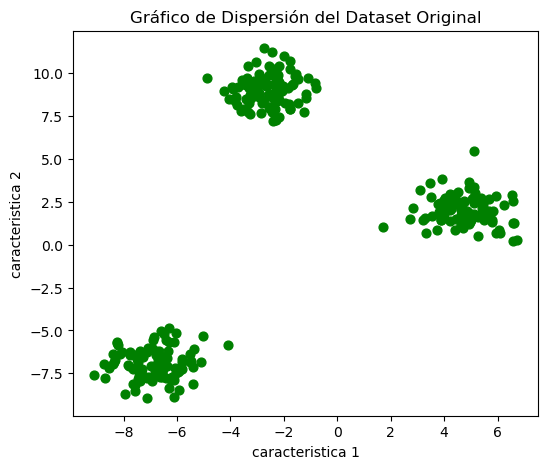

In [3]:
# Despliegue del gráfico de dispersión
plt.figure(figsize=(6,5))
plt.scatter(df['x'], df['y'], c='green', s=40)
plt.title('Gráfico de Dispersión del Dataset Original')
plt.xlabel('caracteristica 1')
plt.ylabel('caracteristica 2')
plt.show()

### 1.4.2 Prediction

In [4]:
# =============================
# Entrenamiento de Kmeans
# =============================

# Se crea el modelo de KMeans:
# - n_clusters=3: número de clusters que se desea encontrar
# - random_state=42: para hacer el resultado reproducible

kmeans = KMeans(n_clusters=3, random_state=42)

# Ajustamos el modelo con los datos X
kmeans.fit(X)

# Obtenemos las etiquetas predichas para cada punto
y_kmeans = kmeans.predict(X)

# Obtenemos las coordenadas de los centroides encontrados
centroids = kmeans.cluster_centers_

C:\Users\aldoc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


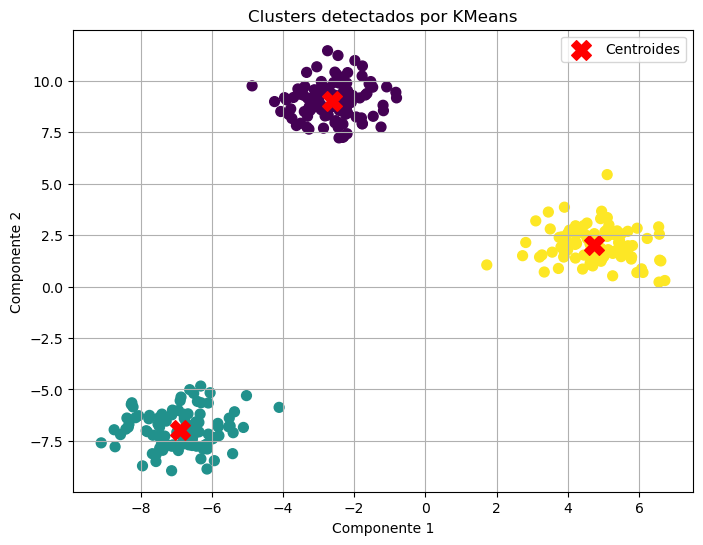

In [5]:
# Visualización de clusters y centroides

plt.figure(figsize=(8, 6))

# Mostramos los puntos, coloreados según el cluster asignado
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Mostramos los centroides con una estrella roja
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroides')

plt.title("Clusters detectados por KMeans")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.legend()
plt.grid(True)
plt.show()

### 1.4.3 Model Evaluation

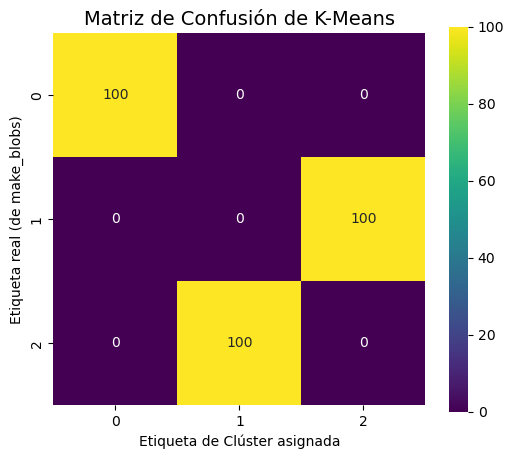


Accuracy del modelo: 33.33%


In [6]:
# ==========
# Evaluación
# ==========

# Matriz de confusión
# Resume los resultados de las predicciones comparándolas con las etiquetas reales.
matriz_conf = confusion_matrix(y_real, y_kmeans)

plt.figure(figsize=(6,5))
sns.heatmap(
    matriz_conf,
    annot=True,
    fmt='d',
    cmap='viridis',
    cbar=True,
    square=True
)

plt.title('Matriz de Confusión de K-Means', fontsize=14)
plt.xlabel('Etiqueta de Clúster asignada')
plt.ylabel('Etiqueta real (de make_blobs)')
plt.show()

acc = accuracy_score(y_real, y_kmeans)
print(f"\nAccuracy del modelo: {acc*100:.2f}%")


El algoritmo KMeans es un método no supervisado, por lo que las etiquetas que asigna a cada clúster (0, 1, 2, etc.) son arbitrarias y no necesariamente coinciden con las etiquetas reales generadas por make_blobs.

Por esta razón, cuando se calcula directamente la matriz de confusión o el accuracy score comparando y_real vs. y_kmeans, los resultados pueden parecer incorrectos aunque no lo sean.

En otras palabras, el modelo sí identifica correctamente los grupos, pero usa números de etiquetas distintos a los que tiene el dataset real.

A continuación se aplica un **remapeo de etiquetas** (usando el algoritmo de asignación húngara) para corregir esta correspondencia y evaluar el rendimiento real del modelo.


Matriz de Confusión (con etiquetas remapeadas):



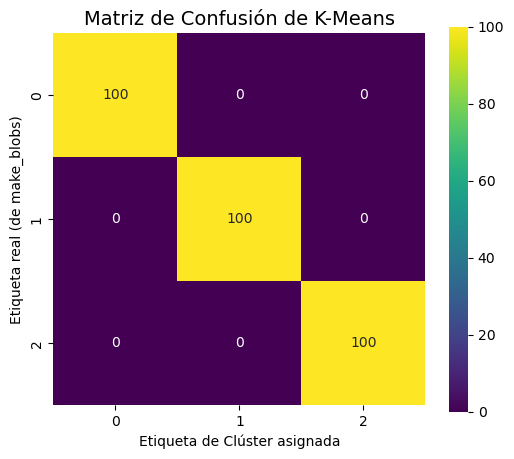

Accuracy (tras remapeo de etiquetas): 100.00%


In [7]:
# ===========================================
# Remapeo de etiquetas del KMeans (Hungarian)
# ===========================================

# Importamos la función linear_sum_assignment del módulo scipy.optimize
# (implementa el algoritmo Hungarian, usado para optimizar asignaciones entre grupos)
from scipy.optimize import linear_sum_assignment

# Calculamos la matriz de confusión original comparando las etiquetas reales con las predichas
matriz_conf = confusion_matrix(y_real, y_kmeans)

# Creamos una "matriz de costo" para el algoritmo Hungarian
# (convertimos la matriz de confusión en una matriz que queremos minimizar)
cost = matriz_conf.max() - matriz_conf

# Aplicamos el algoritmo Hungarian para encontrar la asignación óptima entre etiquetas reales y predichas
row_ind, col_ind = linear_sum_assignment(cost)

# Construimos un diccionario que mapea cada etiqueta predicha (col) a la etiqueta real correspondiente (row)
mapping = {col: row for row, col in zip(row_ind, col_ind)}

# Usamos ese mapeo para reemplazar las etiquetas predichas con las etiquetas reales equivalentes
y_kmeans_mapped = np.array([mapping[label] for label in y_kmeans])

# Recalculamos matriz de confusión y accuracy con las etiquetas remapeadas
matriz_conf_mapped = confusion_matrix(y_real, y_kmeans_mapped)
acc_mapped = accuracy_score(y_real, y_kmeans_mapped)

print("\nMatriz de Confusión (con etiquetas remapeadas):\n")

plt.figure(figsize=(6,5))
sns.heatmap(
    matriz_conf_mapped,
    annot=True,
    fmt='d',
    cmap='viridis',
    cbar=True,
    square=True
)

plt.title('Matriz de Confusión de K-Means', fontsize=14)
plt.xlabel('Etiqueta de Clúster asignada')
plt.ylabel('Etiqueta real (de make_blobs)')
plt.show()

print(f"Accuracy (tras remapeo de etiquetas): {acc_mapped*100:.2f}%")


Después de aplicar el remapeo de etiquetas mediante el algoritmo Hungarian, las etiquetas asignadas por KMeans se alinean con las etiquetas reales generadas por `make_blobs`.

Esto corrige el problema del orden arbitrario de las etiquetas propio del algoritmo no supervisado.
Al recalcular la matriz de confusión y el accuracy:

- La matriz de confusión se vuelve perfectamente diagonal, mostrando una clasificación correcta de los puntos.
- El accuracy aumenta al 100%.

En resumen, el remapeo confirma que KMeans agrupó correctamente los datos, y que el bajo accuracy inicial era solo un efecto del orden diferente de las etiquetas.

## 2. Notebook
El presente notebook se puedan interpretar y ejecutar, sin errores, en Jupyter y/o Google Colab

## Referencias Bibliográficas
- Aviña Méndez, J. A. (abril). Guia de Estudio: Clasificador k-Means [Diapositivas]. Google Classroom.
- Barrios, A. (2023, 8 agosto). Tutorial del algoritmo K-Means en Python. Medium. Recuperado 7 de noviembre de 2025, de https://medium.com/latinxinai/tutorial-del-algoritmo-k-means-en-python-d8055751e2f3
- Yehoshua, R., PhD. (2023, 6 octubre). K-Means Clustering. Medium. Recuperado 7 de noviembre de 2025, de https://medium.com/ai-made-simple/k-means-clustering-e9bd722a09fa
- ChatGPT